### Quadruped PID control

In [1]:
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from mujoco_parser import MuJoCoParserClass
from pid import PID_ControllerClass
from snapbot_util import get_snapbot_q
print ("Done.")

Done.


### Parse quadruped

Creating window glfw
Creating offscreen glfw


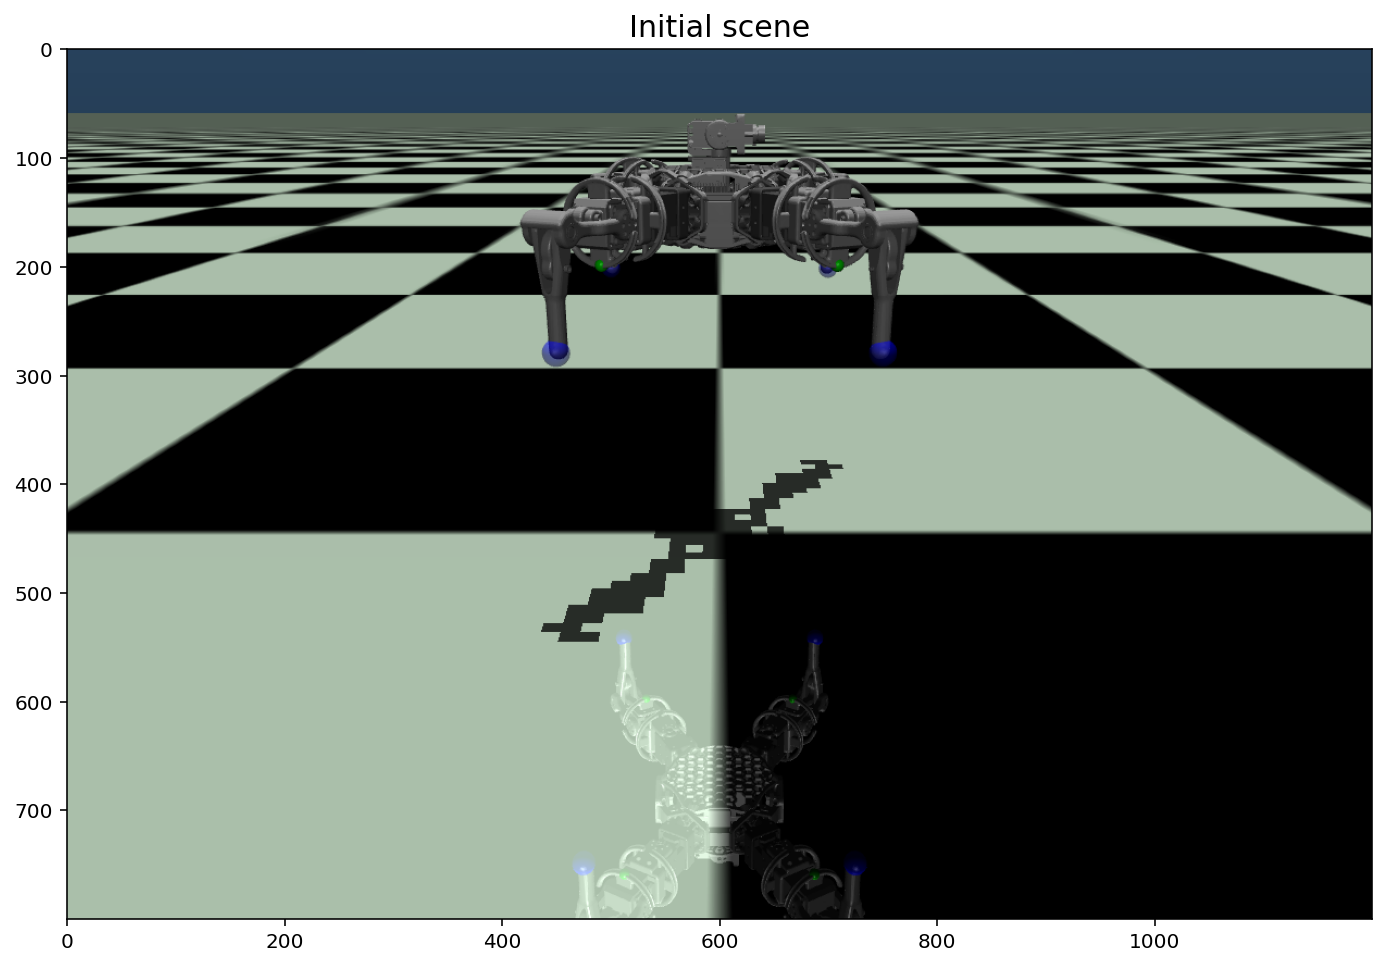

In [2]:
env = MuJoCoParserClass(name='Snapbot',rel_path='../asset/snapbot/robot_4_1245.xml',VERBOSE=False)
PID = PID_ControllerClass(
    name    = 'PID',
    k_p     = 20.0,
    k_i     = 0.1,
    k_d     = 1.0,
    dim     = env.n_torque,
    out_min = env.torque_range[:,0],
    out_max = env.torque_range[:,1])
env.init_viewer(TERMINATE_GLFW=True,window_width=0.5,window_height=0.5,cam_distance=1.0,cam_elevation=-45)
env.plot_scene(figsize=(12,8),render_w=1200,render_h=800,
               cam_distance=1.0,cam_elevation=-20,cam_lookat=[0,0,-0.25],
               title_str='Initial scene',title_fs=15)

In [3]:
env.reset()
env.init_viewer(TERMINATE_GLFW=True,window_width=0.5,window_height=0.5,cam_distance=1.0,
                cam_elevation=-20,cam_lookat=[0,0,-0.1])
env.set_max_sec(max_sec=5)

# Set PID target
x_trgt = np.zeros(env.n_torque)
# x_trgt = 10*np.pi/180.0*np.random.randn(env.n_torque)

t_list      = np.zeros(shape=(env.max_tick))
x_trgt_list = np.zeros(shape=(env.max_tick,env.n_torque))
q_list      = np.zeros(shape=(env.max_tick,env.n_torque))
torque_list = np.zeros(shape=(env.max_tick,env.n_torque))
while env.IS_ALIVE():
    
    # Get joint position (radian)
    q = get_snapbot_q(env)
    
    # PD controller
    PID.update(x_trgt=x_trgt)
    PID.update(t_curr=env.get_sec_sim(),x_curr=q,VERBOSE=False)
    
    # Step
    torque = PID.out()
    env.step_and_render(torque=torque,TORQUE_TO_REV_JOINT=False,render_speedup=1.0,RENDER_ALWAYS=False)
    env.print(print_every_sec=1,VERBOSE=1)
    
    # Append
    t_list[env.tick-1]        = env.get_sec_sim()
    x_trgt_list[env.tick-1,:] = PID.x_trgt
    q_list[env.tick-1,:]      = q
    torque_list[env.tick-1,:] = torque
    
print ("Done.")

Creating window glfw
tick:[1/1251], sec_wall:[0.224]sec, sec_sim:[0.004]sec
tick:[251/1251], sec_wall:[0.940]sec, sec_sim:[1.004]sec
tick:[501/1251], sec_wall:[1.844]sec, sec_sim:[2.004]sec
tick:[751/1251], sec_wall:[2.840]sec, sec_sim:[3.004]sec
tick:[1001/1251], sec_wall:[3.869]sec, sec_sim:[4.004]sec
tick:[1251/1251], sec_wall:[4.899]sec, sec_sim:[5.004]sec
Done.


Creating window glfw


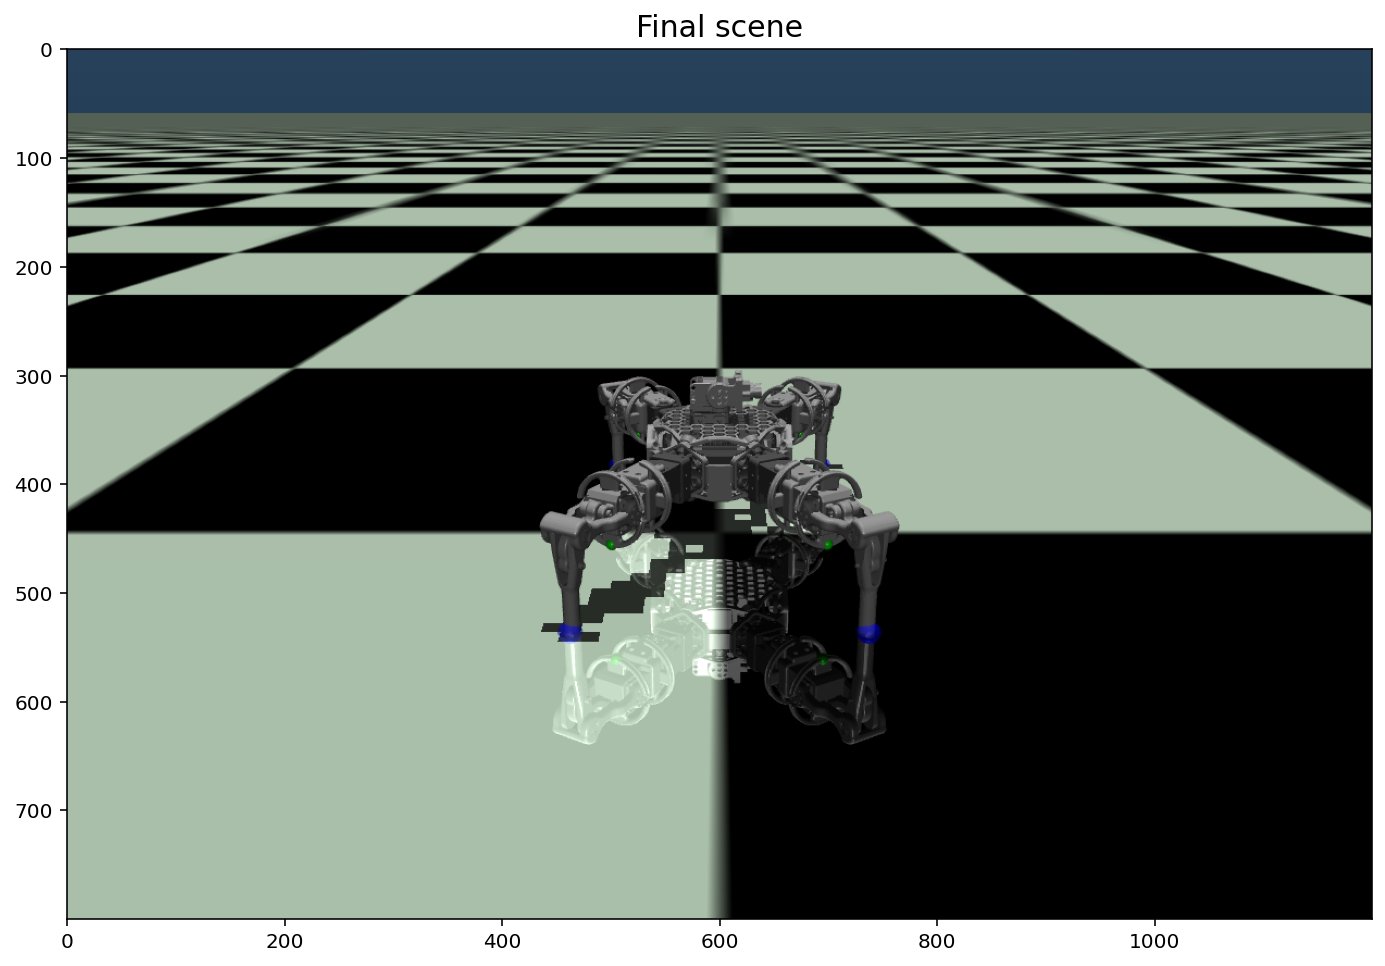

In [4]:
env.init_viewer(TERMINATE_GLFW=True,window_width=0.5,window_height=0.5,cam_distance=1.0,cam_elevation=-45)
env.plot_scene(figsize=(12,8),render_w=1200,render_h=800,
               cam_distance=1.0,cam_elevation=-20,cam_lookat=[0,0,-0.25],
               title_str='Final scene',title_fs=15)

In [5]:
env.terminate_viewer() # terminate viewer

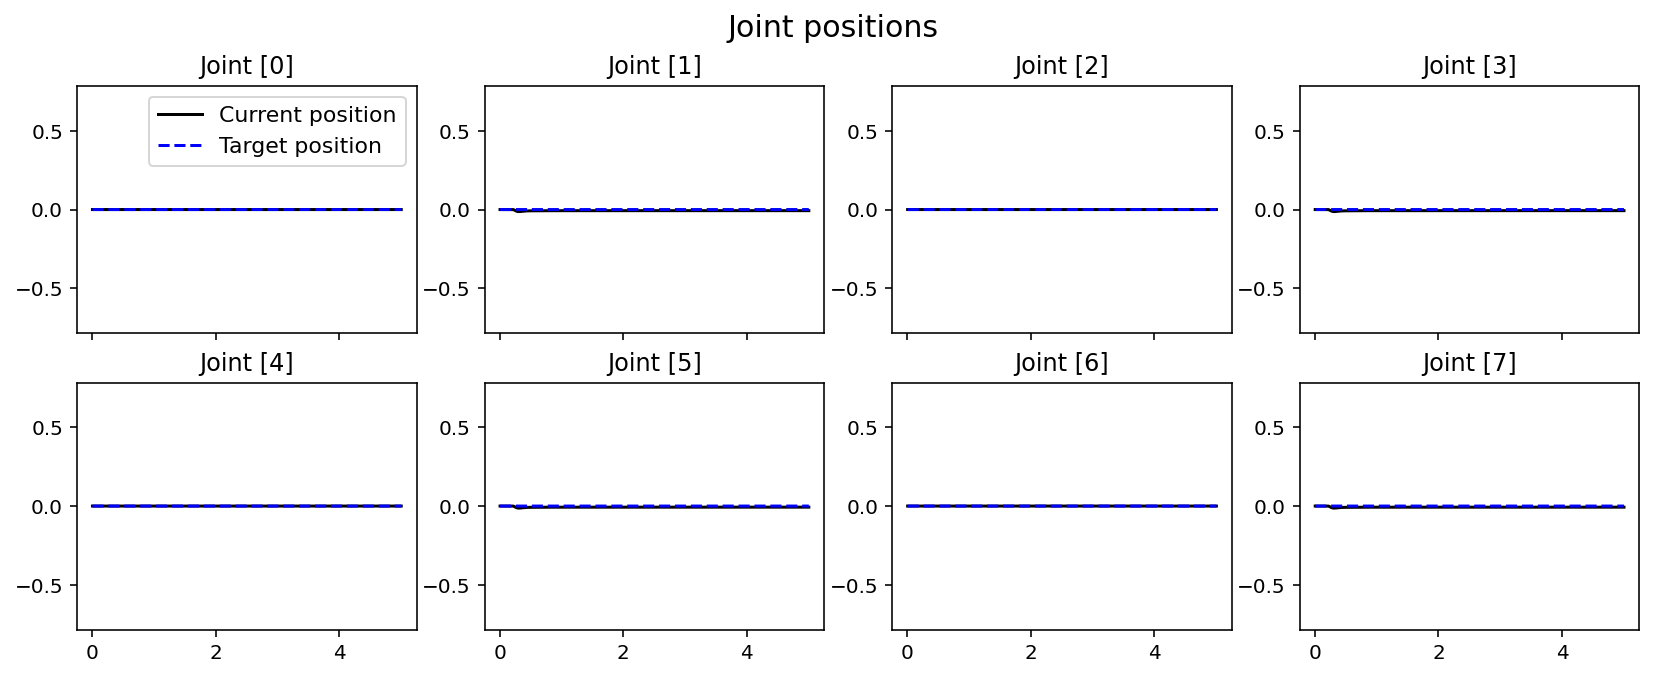

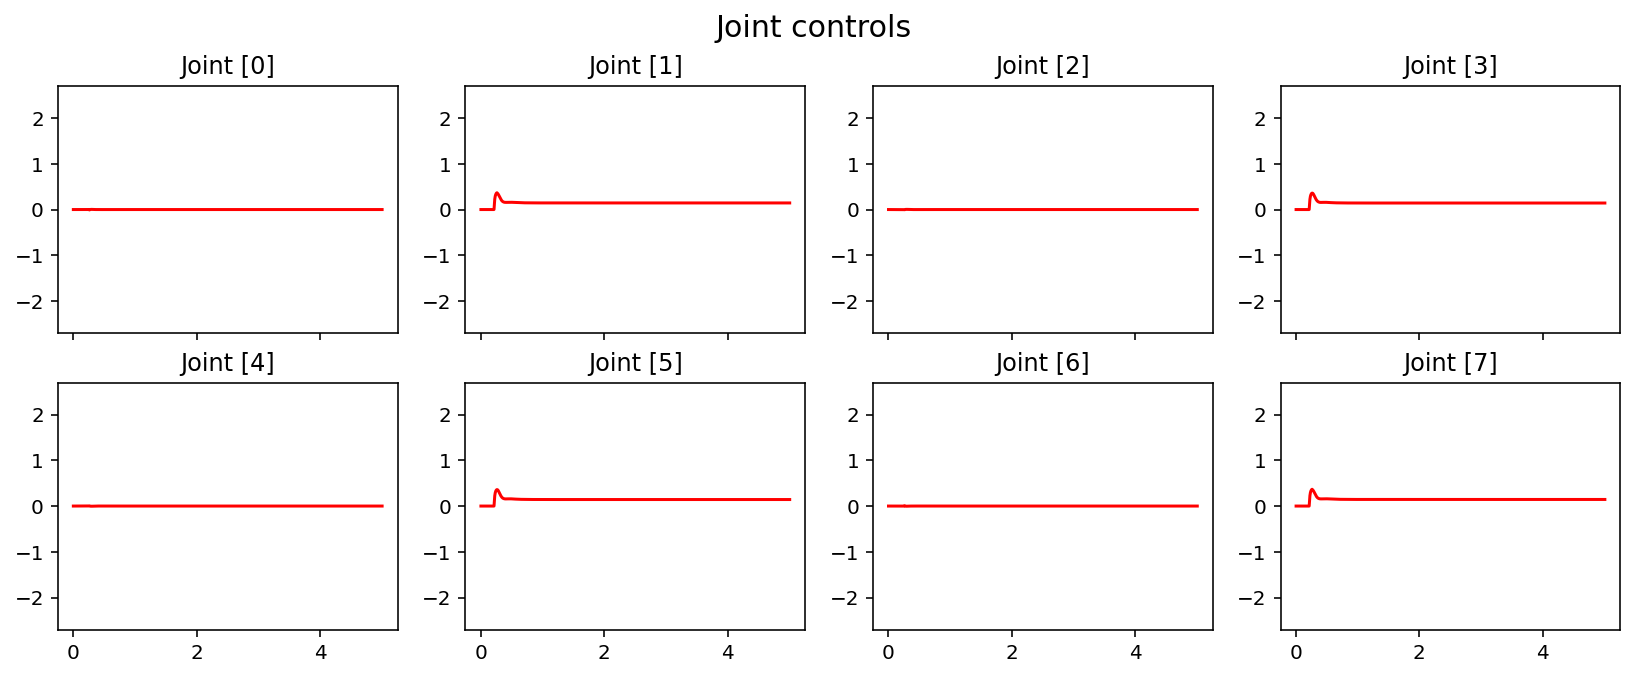

In [6]:
# Plot target and current joint position
fig,axs = plt.subplots(nrows=2,ncols=4,sharex=True,sharey=False,figsize=(14,5))
fig.suptitle("Joint positions", fontsize=15)
for a_idx,ax in enumerate(axs.ravel()):
    ax.plot(t_list,q_list[:,a_idx],color='k',label='Current position')
    ax.plot(t_list,x_trgt_list[:,a_idx],'--',color='b',label='Target position')
    ax.set_ylim(bottom=-45*np.pi/180.0,top=45*np.pi/180.0)
    ax.set_title('Joint [%d]'%(a_idx))
    if a_idx == 0:
        ax.legend(fontsize=11)
plt.show()
# Plot control output
fig,axs = plt.subplots(nrows=2,ncols=4,sharex=True,sharey=False,figsize=(14,5))
fig.suptitle("Joint controls", fontsize=15)
for a_idx,ax in enumerate(axs.ravel()):
    ax.plot(t_list,torque_list[:,a_idx],color='r')
    ax.set_ylim(bottom=env.torque_range[a_idx,0],top=env.torque_range[a_idx,1])
    ax.set_title('Joint [%d]'%(a_idx))
plt.show()